# Data Preprocessing

Data Preprocessing modelling with all the automatic features for preparing the dataset for running models:
    - Data Overview
    - Data Types
    - Handling Missing Data
    - Outlier Detection
    - Plotting Distributions
    - Handling Categorical Data
        - Label Encoder
        - One Hot Encoder (OHE)
        - Label Binarizer (if necessary)
    - Normalizer/Standarlizer
    - Featuring Engineering:
        Feature Extraction
        Dimensionality Reduction by PCA
    - Feature Selection

# Initialize

In [2]:
import pandas as pd         #pandas data manipulation
import numpy as np          #numpy arrays manipulation 
import missingno as msno    #missingno missing values
import gc                   #ram optimization
import matplotlib.pyplot as plt

In [3]:
# Setting working directory

path = '../MOZAIC/'

# Loading Files

In [4]:
# read the data from csv
df = pd.read_excel('mozaic_1810.xlsx')

In [5]:
df.rename(columns={'var1': 'id', 'var11': 'target'}, inplace=True)

In [ ]:
# view columns using df.columns
X.columns

In [6]:
# Generates descriptive statistics that summarize the central tendency
df.describe()

,var2,var5,target,var12,var13,var14,var15,var16,var17,var18,...,var35,var36,var37,var38,var39,var40,var43,var44,var45,var58
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,609.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,500.500000,6.970000,41.158000,0.999000,2.50500,2759.404000,246.610440,2.975000,17.618000,...,2.939000,19.903860,2.928000,7.844590,3.047000,20.910000,-17.389997,-46.435387,2.620000,50.952000
std,288.819436,288.819436,1.453001,13.882931,0.819555,1.66816,1295.377179,84.720865,1.428431,4.598176,...,1.423132,8.617621,1.413086,4.023588,1.383005,11.284724,8.140649,6.830737,1.690698,28.745121
min,1.000000,1.000000,5.000000,18.000000,0.000000,0.00000,504.000000,100.010000,1.000000,10.000000,...,1.000000,5.010000,1.000000,1.010000,1.000000,1.130000,-33.518890,-72.677560,0.000000,0.000000
25%,250.750000,250.750000,6.000000,29.000000,0.000000,1.00000,1612.750000,172.625000,2.000000,14.000000,...,2.000000,12.552500,2.000000,4.485000,2.000000,10.720000,-23.086898,-50.350695,1.000000,26.000000
50%,500.500000,500.500000,7.000000,41.000000,1.000000,3.00000,2797.500000,245.230000,3.000000,18.000000,...,3.000000,19.815000,3.000000,7.750000,3.000000,22.030000,-20.031525,-46.819860,3.000000,52.000000
75%,750.250000,750.250000,8.000000,53.000000,2.000000,4.00000,3897.500000,316.240000,4.000000,22.000000,...,4.000000,27.165000,4.000000,11.292500,4.000000,30.070000,-10.324030,-41.219655,4.000000,75.000000
max,1000.000000,1000.000000,9.000000,65.000000,2.000000,5.00000,5000.000000,399.660000,5.000000,25.000000,...,5.000000,34.890000,5.000000,14.980000,5.000000,39.980000,-0.118100,-32.410830,5.000000,100.000000


In [41]:
# Returns first n rows
df.head(5)

,id,var2,var5,var6,var7,var8,var9,var10,target,var12,...,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71
0,Helen,1,1,Male,fundamental,nao,homo,solteiro,9,35,...,picanha,tomate,torta,pao_frances,bombom,barra_cereal,papel,sabao_em_po,copo,racao
1,Ivana,2,2,Male,medio,nao,hetero,casado,6,36,...,costela,cebola,coxinha,queijo,barra chocolate,granola,shampoo,amaciante,prato,shampoo
2,Ebony,3,3,Male,superior,nao,hetero,casado,5,24,...,frango,alho,pastel,salame,bolacha,aveia,sabonete,detergente,garfo,racao
3,Cedric,4,4,Female,pos graduacao,sim,hetero,casado,8,37,...,file,brocolis,risolis,presunto,bombom,iogurte_natural,creme_dental,alvejante,colher,racao
4,Mason,5,5,Male,fundamental,nao,hetero,divorciado,7,43,...,carre_suino,couve flor,quiche,mortadela,barra chocolate,linhaça,condicionador,vassoura,faca,racao


In [42]:
# Return a tuple representing the dimensionality of the DataFrame.
df.shape

(1000, 69)

# Target Analysis

In [46]:
y = df['target']

In [47]:
y.head(5)

0    9
1    6
2    5
3    8
4    7
Name: target, dtype: int64

# Data Analysis

In [ ]:
# Return the dtypes in this object
df.dtypes

In [48]:
def get_meta(train):
    data = []
    for col in train.columns:
        # Defining the role
        if col == 'target':
            role = 'target'
        elif col == 'id':
            role = 'id'
        else:
            role = 'input'

        # Defining the level
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif train[col].dtype == np.float64:
            level = 'interval'
        elif train[col].dtype == np.int64:
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id':
            keep = False

        # Defining the data type 
        dtype = train[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'keep'   : keep,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
    meta.set_index('varname', inplace=True)
    return meta

In [49]:
meta_data = get_meta(df)
meta_data

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,object
var2,input,ordinal,True,int64
var5,input,ordinal,True,int64
var6,input,ordinal,True,object
var7,input,ordinal,True,object
var8,input,ordinal,True,object
var9,input,ordinal,True,object
var10,input,ordinal,True,object
target,target,binary,True,int64


In [50]:
meta_counts = meta_data.groupby(['role', 'level']).agg({'dtype': lambda x: x.count()}).reset_index()
meta_counts

,role,level,dtype
0,id,nominal,1
1,input,interval,10
2,input,ordinal,57
3,target,binary,1


In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=meta_counts[(meta_counts.role != 'target') & (meta_counts.role != 'id') ],x="level",y="dtype",ax=ax,color=default_color)
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

# Handling Missing Data

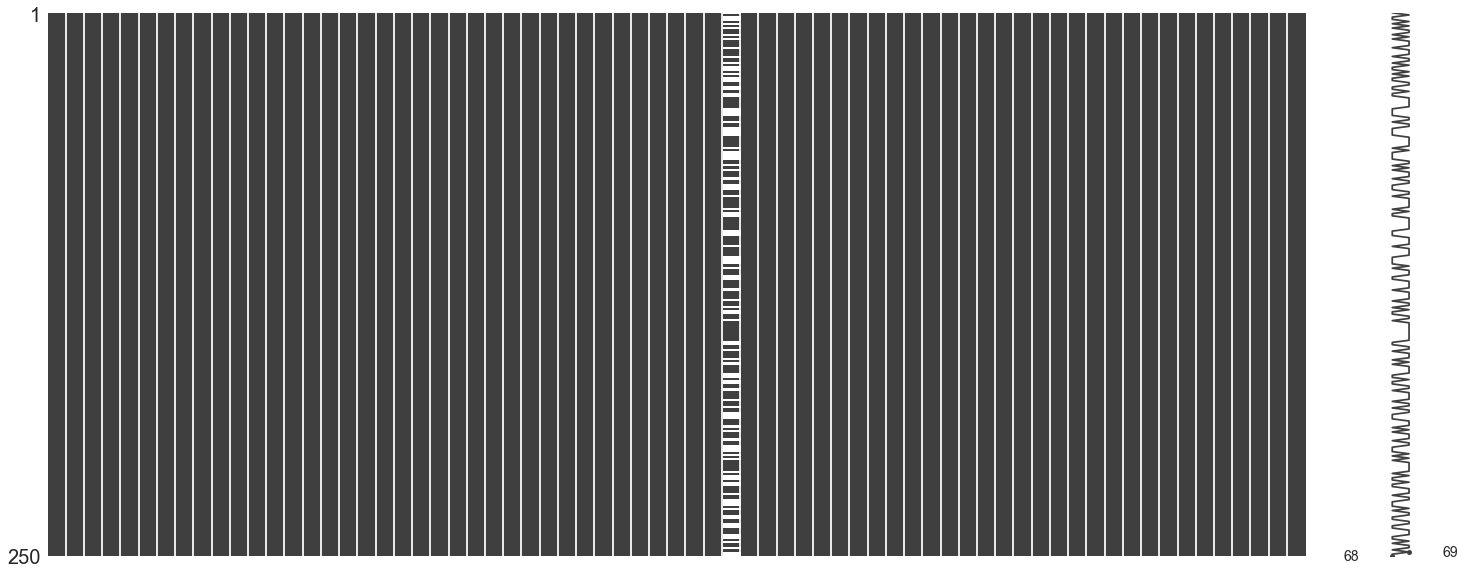

In [28]:
import missingno as msno
%matplotlib inline
msno.matrix(data.sample(250))

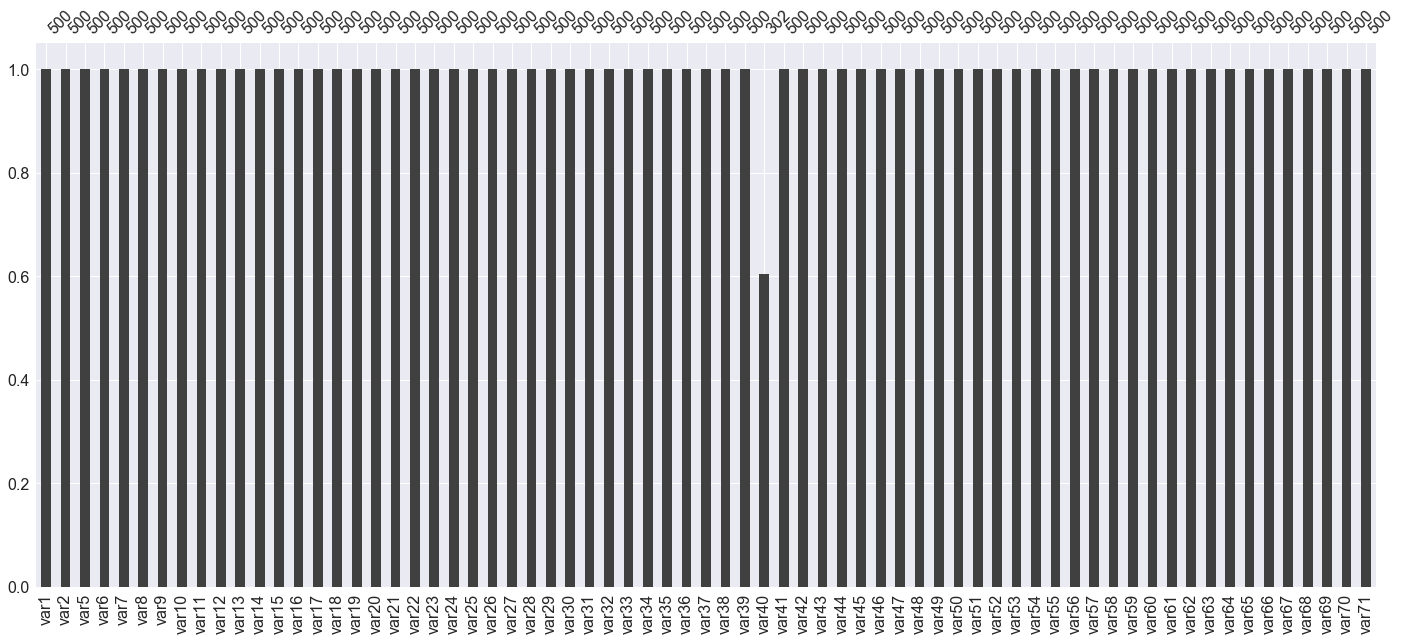

In [29]:
msno.bar(data.sample(500))

# Handling categorical data 

Label Encoder

One Hot Encoder (OHE)

Label Binarizer
Binarize labels in a one-vs-all fashion
Several regression and binary classification algorithms are available in the scikit. A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.
At learning time, this simply consists in learning one regressor or binary classifier per class. In doing so, one needs to convert multi-class labels to binary labels (belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method.

# Label Encoder

In [ ]:
# TODO: create a LabelEncoder object and fit it to each feature in X
# import preprocessing from sklearn
from sklearn import preprocessing

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X = X.apply(le.fit_transform)

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
y = y.apply(le.fit_transform)


# One Hot Encoder (OHE)

In [ ]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X)

# 3. Transform

# onehotlabels = enc.transform(X).toarray()
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

# Label Binarizer

In [ ]:
def featurize(features):
  transformations = [
                            ('Embarked', LabelBinarizer()),
                            ('Fare', None),
                            ('Parch', None),
                            ('Pclass', LabelBinarizer()),
                            ('Sex', LabelBinarizer()),
                            ('SibSp', None),                                       
                            ('Title', LabelBinarizer()),
                            ('FamilySize', None),
                            ('FamilyID', LabelBinarizer()),
                            ('AgeOriginallyNaN', None),
                            ('AgeFilledMedianByTitle', None)]

  return DataFrameMapper(filter(lambda x: x[0] in df.columns, transformations))

# Feature Scalling

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. It is performed on continuous variables. Lets plot the distribution of all the continuous variables in the data set.

The processo for feature scalling are:
    - Rescale Data
    - Standardize Data
    - Normalize Data

In [ ]:

df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")|(df.dtypes=="object")].index.values].hist(figsize=[11,11])

# Rescale Data

In [ ]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

# Standardize Data

In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

# Normalize Data

In [ ]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(normalizedX[0:5,:])

# Binarize Data (Make Binary)

In [ ]:
# binarization
from sklearn.preprocessing import Binarizer
import pandas
import numpy
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(binaryX[0:5,:])

# Feature Engineering